Correlation matrix:
            Production     Close
Production    1.000000  0.911969
Close         0.911969  1.000000


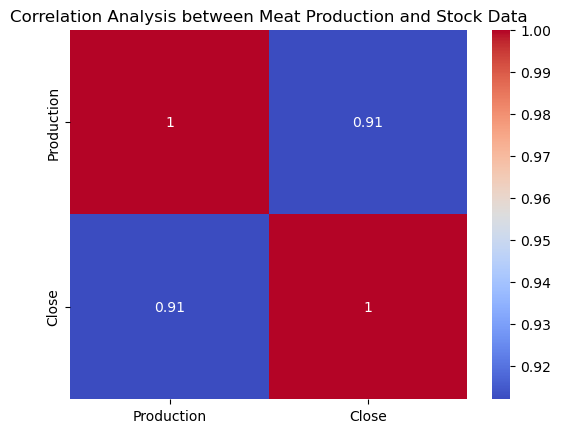

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the display option to ensure all columns of the DataFrame are printed
pd.set_option('display.max_columns', None)

# Function to load and prepare meat production data
def load_and_prepare_meat_data(filepath):
    data = pd.read_csv(filepath)
    # Convert 'Date' to datetime and extract the year
    data['Year'] = pd.to_datetime(data['Date'], format='%b-%Y').dt.year
    # Convert 'Production' to a numeric value, assuming it's a string with commas
    data['Production'] = pd.to_numeric(data['Production'].str.replace(',', ''), errors='coerce')
    # Aggregate production data by year
    yearly_data = data.groupby('Year')['Production'].sum().reset_index()
    return yearly_data

# Function to load and prepare stock data
def load_and_prepare_stock_data(filepath):
    data = pd.read_csv(filepath)
    # Convert 'Date-Time' to datetime and extract the year
    data['Year'] = pd.to_datetime(data['Date-Time']).dt.year
    # Aggregate stock data by year (mean of 'Close' prices)
    yearly_data = data.groupby('Year').agg({'Close': 'mean'}).reset_index()
    return yearly_data

# Function to calculate correlation and generate heatmap
def calculate_correlation_and_heatmap(meat_data, stocks_data):
    # Merge datasets on Year
    merged_data = pd.merge(meat_data, stocks_data, on='Year', how='inner')
    # Calculate the correlation matrix for numerical data only
    correlation_matrix = merged_data.drop('Year', axis=1).corr()
    # Print the correlation matrix
    print("Correlation matrix:")
    print(correlation_matrix)
    # Plot the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Analysis between Meat Production and Stock Data')
    plt.show()

# Main function to run the analysis
def main():
    meat_data_path = '/Users/moritzogon/Downloads/datathon data/Meat_Stats_Meat_Production.csv'
    stocks_data_path = '/Users/moritzogon/Downloads/datathon data/all_stock_and_etfs.csv'

    # Load and prepare data
    meat_data_yearly = load_and_prepare_meat_data(meat_data_path)
    stocks_data_yearly = load_and_prepare_stock_data(stocks_data_path)

    # Calculate correlation and generate heatmap
    calculate_correlation_and_heatmap(meat_data_yearly, stocks_data_yearly)

if __name__ == "__main__":
    main()


Correlation matrix:
            Production  Employment
Production    1.000000    0.839558
Employment    0.839558    1.000000


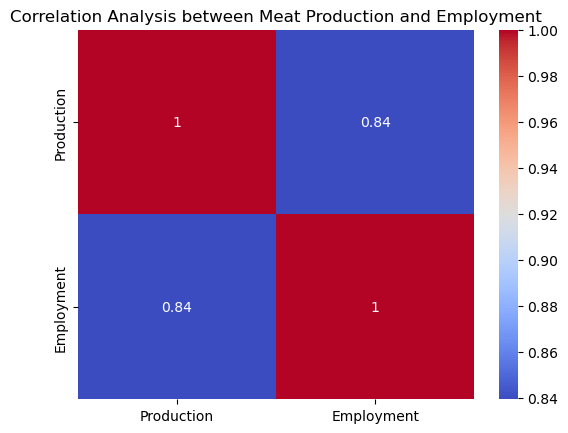

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Function to load and prepare meat production data
def load_and_prepare_meat_data(filepath):
    data = pd.read_csv(filepath)
    data['Year'] = pd.to_datetime(data['Date'], format='%b-%Y').dt.year
    data['Production'] = pd.to_numeric(data['Production'].str.replace(',', ''), errors='coerce')
    yearly_production = data.groupby('Year')['Production'].sum().reset_index()
    return yearly_production

# Function to load and prepare employment data
def load_and_prepare_employment_data(filepath, category_name):
    data = pd.read_csv(filepath)
    # Filter out rows for the specific agriculture category and extract the estimate from the fourth column
    category_filter = data.iloc[:, 0].str.strip() == category_name
    agriculture_data = data[category_filter]
    estimates = pd.to_numeric(agriculture_data.iloc[:, 3], errors='coerce') * 1000  # Convert to full number, since the original is in thousands
    years = pd.to_numeric(agriculture_data.iloc[:, 7], errors='coerce')  # Index 7 assuming the 8th column contains the year
    employment_data = pd.DataFrame({'Year': years, 'Employment': estimates})
    # Group by year and sum the estimates across all states
    yearly_employment = employment_data.groupby('Year')['Employment'].sum().reset_index()
    return yearly_employment

# Function to calculate correlation and generate heatmap
def calculate_correlation_and_heatmap(production_data, employment_data):
    merged_data = pd.merge(production_data, employment_data, on='Year', how='inner')
    correlation_matrix = merged_data.drop('Year', axis=1).corr()
    print("Correlation matrix:")
    print(correlation_matrix)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Analysis between Meat Production and Employment')
    plt.show()

# Main function to run the analysis
def main():
    meat_data_path = '/Users/moritzogon/Downloads/datathon data/Meat_Stats_Meat_Production.csv'  # Replace with your actual file path
    employment_data_path = '/Users/moritzogon/Downloads/datathon data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv'  # Replace with your actual file path

    meat_production_yearly = load_and_prepare_meat_data(meat_data_path)
    employment_yearly = load_and_prepare_employment_data(employment_data_path,
                                                         'Agriculture, forestry, fishing and hunting, and mining')

    if not meat_production_yearly.empty and not employment_yearly.empty:
        calculate_correlation_and_heatmap(meat_production_yearly, employment_yearly)
    else:
        print("One or both of the datasets are empty, correlation cannot be calculated.")

if __name__ == "__main__":
    main()


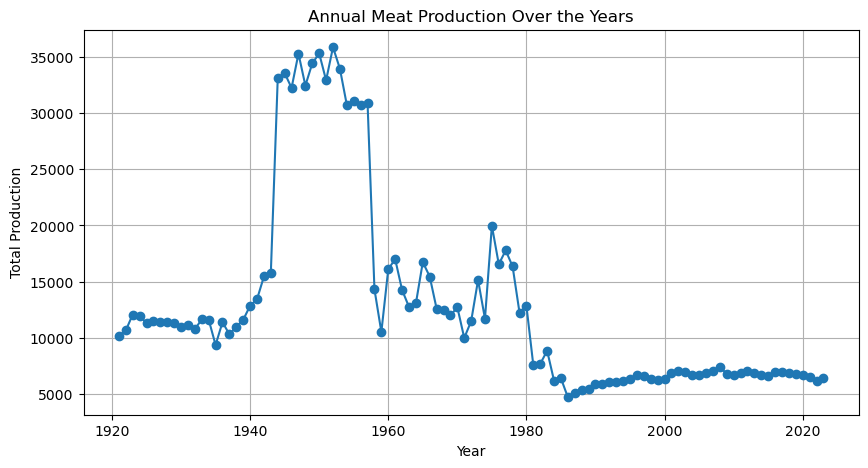

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load and clean the data
def load_and_prepare_data(filepath):
    # Load the data
    data = pd.read_csv(filepath)
    
    # Ensure the 'Date' column is a datetime type
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    
    # Extract the year from the 'Date' column if not already provided
    data['Year'] = data['Date'].dt.year
    
    # Convert 'Production' to numeric, assuming it's a string with commas
    data['Production'] = pd.to_numeric(data['Production'].replace(',', ''), errors='coerce')
    
    # Drop rows with missing values
    data.dropna(subset=['Year', 'Production'], inplace=True)
    
    # Aggregate production data by year
    annual_production = data.groupby('Year')['Production'].sum().reset_index()
    
    return annual_production

# Function to plot the data
def plot_data(data):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Year'], data['Production'], marker='o')
    plt.title('Annual Meat Production Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Total Production')
    plt.grid(True)
    plt.show()

# Main function to control workflow
def main():
    # Path to the dataset
    file_path = '/Users/moritzogon/Downloads/datathon data/Meat_Stats_Meat_Production.csv'  # Update this path as necessary
    
    # Load and prepare the data
    prepared_data = load_and_prepare_data(file_path)
    
    # Plot the data
    plot_data(prepared_data)

if __name__ == "__main__":
    main()


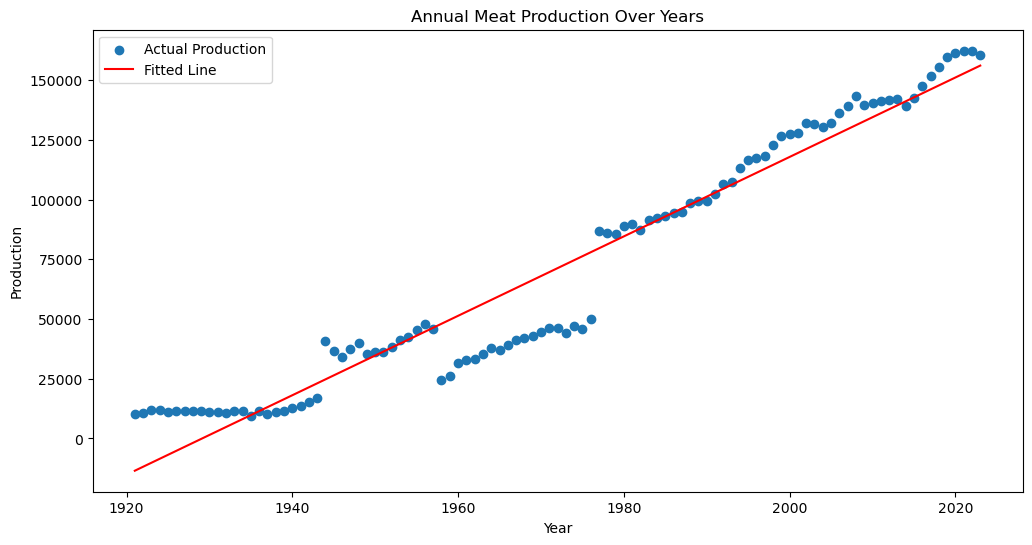

                            OLS Regression Results                            
Dep. Variable:             Production   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1524.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           9.75e-63
Time:                        11:16:25   Log-Likelihood:                -1119.7
No. Observations:                 103   AIC:                             2243.
Df Residuals:                     101   BIC:                             2249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.208e+06    8.4e+04    -38.179      0.0

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
file_path = '/Users/moritzogon/Downloads/datathon data/Meat_Stats_Meat_Production.csv'  # Replace with the path to your CSV file
meat_data = pd.read_csv(file_path)

# Assuming 'Date' is in the format 'Mon-YYYY' and 'Production' is the monthly production values
# Convert 'Date' to datetime and extract year
meat_data['Year'] = pd.to_datetime(meat_data['Date'], format='%b-%Y').dt.year

# Ensure 'Production' is a float type
meat_data['Production'] = meat_data['Production'].str.replace(',', '').astype(float)

# Aggregate production by year
annual_production = meat_data.groupby('Year')['Production'].sum().reset_index()

# Perform linear regression
# Prepare the data for OLS by adding a constant to the predictor
X = sm.add_constant(annual_production['Year'])
y = annual_production['Production']

# Fit the model
model = sm.OLS(y, X).fit()

# Plot the original data and the fitted line
plt.figure(figsize=(12, 6))
plt.scatter(annual_production['Year'], annual_production['Production'], label='Actual Production')
plt.plot(annual_production['Year'], model.fittedvalues, label='Fitted Line', color='red')
plt.title('Annual Meat Production Over Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.show()

# Print out the summary statistics
print(model.summary())


In [14]:
import pandas as pd

# Replace these paths with the actual paths to your files
file_path1 = '/Users/moritzogon/Downloads/datathon data/CVGW.csv'
file_path2 = '/Users/moritzogon/Downloads/datathon data/BABYF.csv'
file_path3 = '/Users/moritzogon/Downloads/datathon data/BYND.csv'
file_path4 = '/Users/moritzogon/Downloads/datathon data/TTCFQ.csv'

# Read the CSV files
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)
df4 = pd.read_csv(file_path4)

# Merge the dataframes. This assumes that all dataframes have the same structure and columns
merged_df = pd.concat([df1, df2, df3, df4])

# Save the merged dataframe to a new CSV file
merged_df.to_csv('merged_file.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/moritzogon/Downloads/datathon data/CVGW.csv'

In [2]:
import pandas as pd

# Define the paths to your files and their corresponding stock tickers
file_paths = {
    'CVGW': '/Users/moritzogon/Downloads/CVGW.csv',
    'BABYF': '/Users/moritzogon/Downloads/BABYF.csv',
    'BYND': '/Users/moritzogon/Downloads/BYND.csv',
    'TTCFQ': '/Users/moritzogon/Downloads/TTCFQ.csv',
}

# Create a list to hold all the dataframes
df_list = []

# Loop through the dictionary, read each file and add a 'Ticker' column
for ticker, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    df['Ticker'] = ticker  # Add a column with the stock ticker
    df_list.append(df)

# Combine all dataframes into one
merged_df = pd.concat(df_list, ignore_index=True)

# Save the combined dataframe to a new CSV file
merged_df.to_csv('/Users/moritzogon/Downloads/datathon data/newmerged_file.csv', index=False)


KeyError: 'Date'

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
meat_stocks_path = '/Users/moritzogon/Downloads/datathon data/all_stock_and_etfs.csv'
plant_stocks_path = '/Users/moritzogon/Downloads/newmerged_file.csv'

def read_and_process_stock_data(file_path, date_column):
    # Read the data
    df = pd.read_csv(file_path)
    
    # Parse the date column to datetime and extract the year
    df[date_column] = pd.to_datetime(df[date_column])
    df['Year'] = df[date_column].dt.year
    
    # Group by 'Ticker' and 'Year', and calculate the average volume
    df_yearly = df.groupby(['Ticker', 'Year'])['Volume'].mean().reset_index()
    
    return df_yearly

# Read and process the meat and plant stocks data
# Adjust the date column name for each dataset
meat_df_yearly = read_and_process_stock_data(meat_stocks_path, 'Date-Time')
plant_df_yearly = read_and_process_stock_data(plant_stocks_path, 'Date')

# Now let's create the plot
plt.figure(figsize=(12, 6))

# Meat stocks plot
for ticker in meat_df_yearly['Ticker'].unique():
    subset = meat_df_yearly[meat_df_yearly['Ticker'] == ticker]
    plt.plot(subset['Year'], subset['Volume'], label=ticker + " - Meat")

# Plant-based stocks plot
for ticker in plant_df_yearly['Ticker'].unique():
    subset = plant_df_yearly[plant_df_yearly['Ticker'] == ticker]
    plt.plot(subset['Year'], subset['Volume'], label=ticker + " - Plant", linestyle='--')

plt.title('Yearly Average Stock Volumes: Meat vs Plant-based Companies')
plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.legend()
plt.tight_layout()
plt.show()


KeyError: 'Ticker'

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
meat_stocks_path = '/Users/moritzogon/Downloads/datathon data/all_stock_and_etfs.csv'
plant_stocks_path = '/Users/moritzogon/Downloads/newmerged_file.csv'

def read_and_process_stock_data(file_path, date_column, ticker_column):
    # Read the data
    df = pd.read_csv(file_path)
    
    # Rename the column to 'Ticker'
    df.rename(columns={ticker_column: 'Ticker'}, inplace=True)
    
    # Parse the date column to datetime and extract the year
    df[date_column] = pd.to_datetime(df[date_column])
    df['Year'] = df[date_column].dt.year
    
    # Group by 'Ticker' and 'Year', and calculate the average volume
    df_yearly = df.groupby(['Ticker', 'Year'])['Volume'].mean().reset_index()
    
    return df_yearly

# Read and process the meat and plant stocks data
# Adjust the date and ticker column names for each dataset
meat_df_yearly = read_and_process_stock_data(meat_stocks_path, 'Date-Time', 'Ticker_Symbol')
plant_df_yearly = read_and_process_stock_data(plant_stocks_path, 'Date', 'Ticker')

# Now let's create the plot
plt.figure(figsize=(12, 6))

# Meat stocks plot
for ticker in meat_df_yearly['Ticker'].unique():
    subset = meat_df_yearly[meat_df_yearly['Ticker'] == ticker]
    plt.plot(subset['Year'], subset['Volume'], label=ticker + " - Meat")

# Plant-based stocks plot
for ticker in plant_df_yearly['Ticker'].unique():
    subset = plant_df_yearly[plant_df_yearly['Ticker'] == ticker]
    plt.plot(subset['Year'], subset['Volume'], label=ticker + " - Plant", linestyle='--')

plt.title('Yearly Average Stock Volumes: Meat vs Plant-based Companies')
plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.legend()
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/moritzogon/Downloads/newmerged_file.csv'

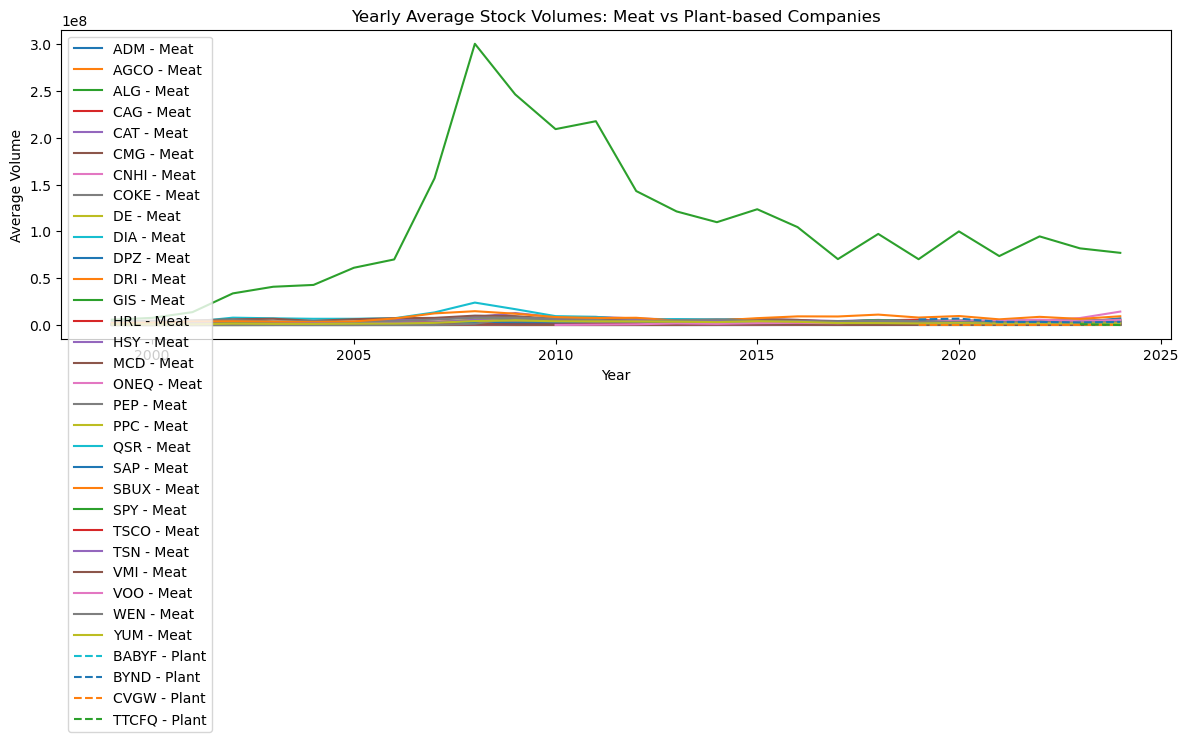

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
meat_stocks_path = '/Users/moritzogon/Downloads/datathon data/all_stock_and_etfs.csv'
plant_stocks_path = '/Users/moritzogon/Downloads/datathon data/newmerged_file.csv'

def read_and_process_stock_data(file_path, date_column, ticker_column):
    # Read the data
    df = pd.read_csv(file_path)
    
    # Rename the column to 'Ticker'
    df.rename(columns={ticker_column: 'Ticker'}, inplace=True)
    
    # Parse the date column to datetime and extract the year
    df[date_column] = pd.to_datetime(df[date_column])
    df['Year'] = df[date_column].dt.year
    
    # Group by 'Ticker' and 'Year', and calculate the average volume
    df_yearly = df.groupby(['Ticker', 'Year'])['Volume'].mean().reset_index()
    
    return df_yearly

# Read and process the meat and plant stocks data
# Adjust the date and ticker column names for each dataset
meat_df_yearly = read_and_process_stock_data(meat_stocks_path, 'Date-Time', 'Ticker_Symbol')
plant_df_yearly = read_and_process_stock_data(plant_stocks_path, 'Date', 'Ticker')

# Now let's create the plot
plt.figure(figsize=(12, 6))

# Meat stocks plot
for ticker in meat_df_yearly['Ticker'].unique():
    subset = meat_df_yearly[meat_df_yearly['Ticker'] == ticker]
    plt.plot(subset['Year'], subset['Volume'], label=ticker + " - Meat")

# Plant-based stocks plot
for ticker in plant_df_yearly['Ticker'].unique():
    subset = plant_df_yearly[plant_df_yearly['Ticker'] == ticker]
    plt.plot(subset['Year'], subset['Volume'], label=ticker + " - Plant", linestyle='--')

plt.title('Yearly Average Stock Volumes: Meat vs Plant-based Companies')
plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.legend()
plt.tight_layout()
plt.show()



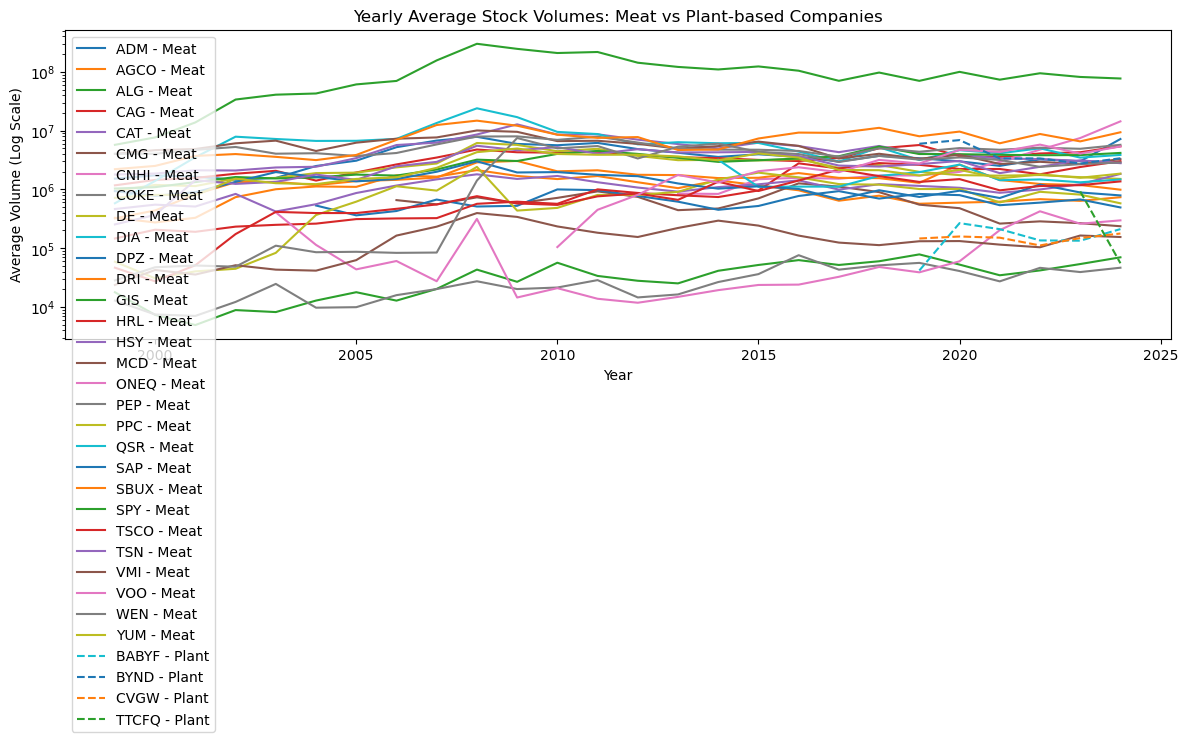

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
meat_stocks_path = '/Users/moritzogon/Downloads/datathon data/all_stock_and_etfs.csv'
plant_stocks_path = '/Users/moritzogon/Downloads/datathon data/newmerged_file.csv'

def read_and_process_stock_data(file_path, date_column, ticker_column):
    # Read the data
    df = pd.read_csv(file_path)
    
    # Rename the column to 'Ticker'
    df.rename(columns={ticker_column: 'Ticker'}, inplace=True)
    
    # Parse the date column to datetime and extract the year
    df[date_column] = pd.to_datetime(df[date_column])
    df['Year'] = df[date_column].dt.year
    
    # Group by 'Ticker' and 'Year', and calculate the average volume
    df_yearly = df.groupby(['Ticker', 'Year'])['Volume'].mean().reset_index()
    
    return df_yearly

# Read and process the meat and plant stocks data
# Adjust the date and ticker column names for each dataset
meat_df_yearly = read_and_process_stock_data(meat_stocks_path, 'Date-Time', 'Ticker_Symbol')
plant_df_yearly = read_and_process_stock_data(plant_stocks_path, 'Date', 'Ticker')

# Now let's create the plot
plt.figure(figsize=(12, 6))

# Meat stocks plot
for ticker in meat_df_yearly['Ticker'].unique():
    subset = meat_df_yearly[meat_df_yearly['Ticker'] == ticker]
    plt.plot(subset['Year'], subset['Volume'], label=ticker + " - Meat")

# Plant-based stocks plot
for ticker in plant_df_yearly['Ticker'].unique():
    subset = plant_df_yearly[plant_df_yearly['Ticker'] == ticker]
    plt.plot(subset['Year'], subset['Volume'], label=ticker + " - Plant", linestyle='--')

# Set the y-axis to a logarithmic scale
plt.yscale('log')  # This sets the y-axis to a logarithmic scale

plt.title('Yearly Average Stock Volumes: Meat vs Plant-based Companies')
plt.xlabel('Year')
plt.ylabel('Average Volume (Log Scale)')
plt.legend()
plt.tight_layout()
plt.show()


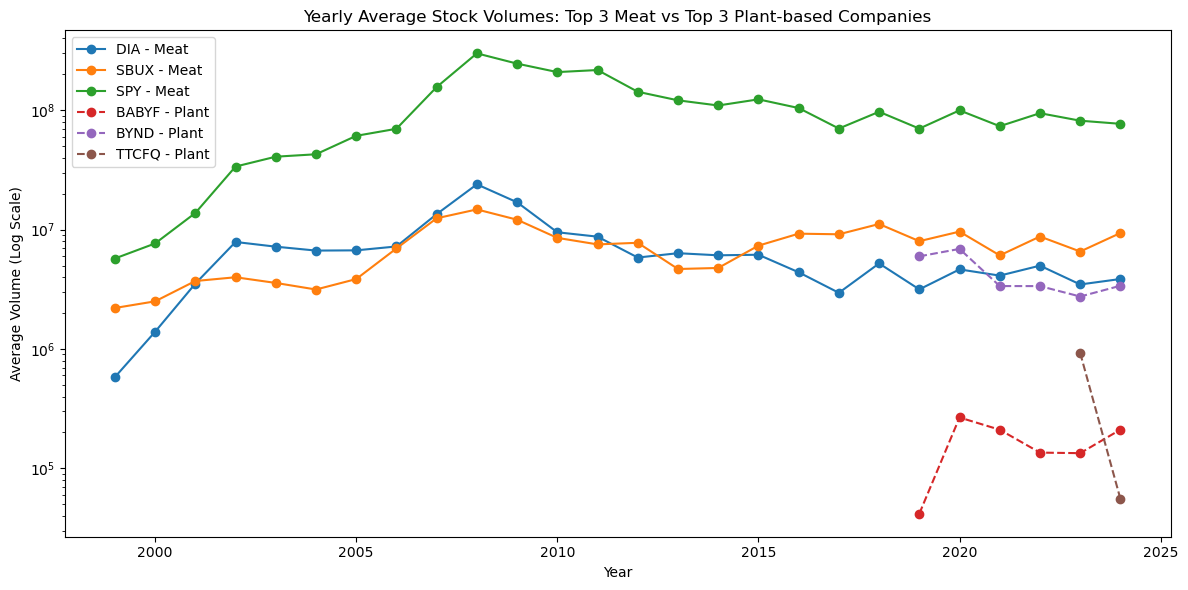

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
meat_stocks_path = '/Users/moritzogon/Downloads/datathon data/all_stock_and_etfs.csv'
plant_stocks_path = '/Users/moritzogon/Downloads/datathon data/newmerged_file.csv'

def read_and_process_stock_data(file_path, date_column, ticker_column):
    # Read the data
    df = pd.read_csv(file_path)
    
    # Rename the column to 'Ticker'
    df.rename(columns={ticker_column: 'Ticker'}, inplace=True)
    
    # Parse the date column to datetime and extract the year
    df[date_column] = pd.to_datetime(df[date_column])
    df['Year'] = df[date_column].dt.year
    
    # Calculate average volume per ticker
    df_avg_volume = df.groupby('Ticker')['Volume'].mean().reset_index().sort_values(by='Volume', ascending=False)
    
    # Get the top 3 tickers based on average volume
    top_tickers = df_avg_volume.head(3)['Ticker']
    
    # Filter the original dataframe to include only the top 3 tickers
    df_top_tickers = df[df['Ticker'].isin(top_tickers)]
    
    # Group by 'Ticker' and 'Year', and calculate the average volume
    df_yearly = df_top_tickers.groupby(['Ticker', 'Year'])['Volume'].mean().reset_index()
    
    return df_yearly

# Read and process the meat and plant stocks data
# Adjust the date and ticker column names for each dataset
meat_df_yearly = read_and_process_stock_data(meat_stocks_path, 'Date-Time', 'Ticker_Symbol')
plant_df_yearly = read_and_process_stock_data(plant_stocks_path, 'Date', 'Ticker')

# Now let's create the plot
plt.figure(figsize=(12, 6))

# Meat stocks plot for the top 3 tickers
for ticker in meat_df_yearly['Ticker'].unique():
    subset = meat_df_yearly[meat_df_yearly['Ticker'] == ticker]
    plt.plot(subset['Year'], subset['Volume'], label=f"{ticker} - Meat", marker='o')

# Plant-based stocks plot for the top 3 tickers
for ticker in plant_df_yearly['Ticker'].unique():
    subset = plant_df_yearly[plant_df_yearly['Ticker'] == ticker]
    plt.plot(subset['Year'], subset['Volume'], label=f"{ticker} - Plant", marker='o', linestyle='--')

# Set the y-axis to a logarithmic scale
plt.yscale('log')

plt.title('Yearly Average Stock Volumes: Top 3 Meat vs Top 3 Plant-based Companies')
plt.xlabel('Year')
plt.ylabel('Average Volume (Log Scale)')
plt.legend()
plt.tight_layout()
plt.show()
